# Линейная регрессия
Линейная регрессия - очень хорошо изученный метод машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

_Этот термин в статистике впервые был использован Френсисом Гальтоном (1886) в связи с исследованием вопросов наследования физических характеристик человека. В качестве одной из характеристик был взят рост человека; при этом было обнаружено, что в целом сыновья высоких отцов, что не удивительно, оказались более высокими, чем сыновья отцов с низким ростом. Более интересным было то, что разброс в росте сыновей был меньшим, чем разброс в росте отцов. Так проявлялась тенденция возвращения роста сыновей к среднему (regression to mediocrity), то есть «регресс»._

Итак: 

$$ y = b + \sum_i w_ix_i$$

$$ y = X*w$$ (почему? какого размера матрицы? куда делась b?)

Где:

 - y - 
 - X
 - w
 
 Как будет выглядеть уравнение относительно первого примера?
 
 
 **Функция потерь (Loss function)**
 
 $$L(X,w,y) = \sum_{i=1}^n {(y_i - \sum_iw_i * x_i)}^2  = (y-Xw)^T(y-Xw) $$
 
 
 Не хотим терять! Никто не хочет:) а в математики это еще и решается с помощью простого уравнения, вот бы и в жизни так:)
 
 А что хотим? Хотим чтобы функция потерь принимала минимальное значение, то есть решаем задачу минимизации функции. Отличная новость, мы ничего уже не решаем, все решено до нас. Оптимизационная задача
 
$$L(X,w,y) \rightarrow min $$
$$\frac{\partial L}{\partial w} = 0 \iff w = (X^TX)^{-1}X^Ty $$

Это выражение называется еще нормальное уравнение

### Нормальное уравнение
(просто название, ненормальных не бывает:))

Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

**Отличная новость!** На практике вам вообще все это не понадобится, но давайте пострадаем немножко

### Fake data

Симуляция - отличный способ разобраться с чем бы то ни было. Сначала сделать модель с известными параметрами, а потом восстановить их. Так и поступим

###  Регрессия с одной переменной

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline


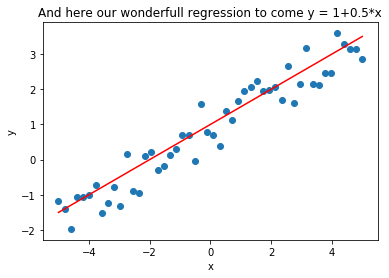

In [18]:
x=  np.linspace(-5,5,50)
a = 1
b = 0.5
eps = np.random.randn(50)
y = a + b*x + 0.5*eps
plt.scatter(x,y); plt.plot(x, a+b*x, color = 'red');
plt.title(f'And here our wonderfull regression to come y = {a}+{b}*x');
plt.xlabel('x');
plt.ylabel('y');

In [75]:
def loss_(y,a,b,x):
    loss = np.sum((y - a-b*x)**2)
    return loss

In [76]:
print(f'Loss for a = {a}, b = {b} is equal to {loss_(y,2,0.5,x)}')

Loss for a = 1, b = 0.5 is equal to 73.56583342222862


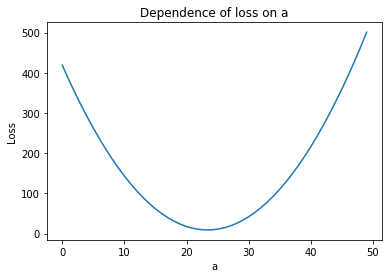

In [77]:
a_v = np.linspace(-2,4)
loss_v = [loss_(y,a,0.5,x) for a in a_v]
plt.plot(loss_v); plt.title('Dependence of loss on a'); plt.xlabel('a'); plt.ylabel('Loss');

In [78]:
#то же самое для b
np.dot(X.T,X)

array([[ 5.00000000e+01, -3.55271368e-15],
       [-3.55271368e-15,  4.33673469e+02]])

###  Найдем решение с помощью нормального уравнения

In [79]:
X = np.hstack([np.ones((x.shape[0],1)),x[:,np.newaxis]])
np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

array([0.86294341, 0.50169771])

In [86]:
## Давайте нарисуем рядышком прямую с найденным параметрами

###  Оптимизация в scipy  

Вообще задача нахождения минимума функции относится к задачам оптимизации. В данном случае относительная простая задача, поскольку функция выпуклая (и что с того???). Для такой задачи существует много методов оптимизации. Есть специальная функция в scipy которая умеет находить параметры модели

Посмотрим сначала что значит выпуклая

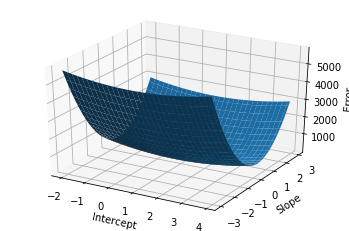

In [80]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis
aa = np.arange(-2, 4, 0.1)
bb = np.arange(-3, 3, 0.1)
aa, bb = np.meshgrid(aa,bb)
L = np.zeros(aa.shape) 
for i in range(aa.shape[0]):
    for j in range(aa.shape[1]):
        L[i,j] = loss_(y, aa[i,j],bb[i,j],x)
surf = ax.plot_surface(aa, bb, L)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()        

In [81]:
def loss_min(w,x,y):
    loss = np.sum((y - w[0]-w[1]*x)**2)
    return loss

In [85]:
res = (optimize.minimize(loss_min, args=(x,y), x0=(0, 0), method='L-BFGS-B', bounds=((-100, 100), (-5, 5)))).x
print(res)

[0.86294341 0.5016977 ]


## Задание 1
А теперь все то же самое (график трехмерный рисовать не надо), но сделаем функцию посложней 
$$y = w_0 + w_1*x_1 +w_2*x_2 + w_3*x_1*x_2+w_4*x_1^2 + w_5*x_2^2$$

## Взгляд на линейную регрессию со стороны теории вероятности

Правдоподобие: вероятность наблюдать наши ответы с теми примерами которые есть при заданном параметре W
$$L(W) = p(y|X;W)$$

Теперь супер трюк: считаем что каждый пример сам по себе и не зависит от остальных, тогда мы можем представить вероятность как произведение

$$L(W) = \prod p(y_i|x_i;W)$$

Что такое $p(y_i|x_i;W)$? 
Тут приходит на помощь центральная предельная теорема. Мы считаем, что ошибки в данных случайные и независимые, тогда $ y_i = Wx_i +e_i \sim N(Wx, \sigma)$, a $$p(y|x_i;W)=\frac{1}{\sqrt{2\pi\sigma}}\frac{\exp-(y_i - W^Tx)^2}{2\sigma^2}$$

Получается произведени кучи членов. Но! если мы возьмем логарифм от функции, то положение максимума не изменится (???). И (надо доделать выкладки)  получаем функцию, которую надо минимизировать (минимизировать???)
$$log L(W) = C+\sum_{i=1}^n {(y_i - \sum_iw_i * x_i)}^2 $$


## R^2

Ну мы уже ввели лося и понимаем как оценивать качество, но вы возьмете другую функцию и никак не получится сравнить одно с другим. Нужна какая то другая мера хорошести аппроксимации.
И ее опять придумали за нас.

$$R^2 = 1 - \frac{\sum_i(y-y_{pred})^2}{\sum_i(y-y_{mean})^2}$$

 - каким может быть показатель?
 - какой он в лучшем случае?
 - какой в худшем?

In [93]:
def r_squared(y_pred,y):
    rel = np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)
    return 1-rel

In [94]:
r_squared(y_pred,y)

0.9164926746108535

In [99]:
print(f'For true set of parameters {r_squared(1+0.5*x,y):.2f}, for esimated {r_squared(0.86+0.5*x,y):.2f}')

For true set of parameters 0.92, for esimated 0.92


## А теперь магия маленькой черной коробочки!!!

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Betty_Boop_patent_fig1.jpg/340px-Betty_Boop_patent_fig1.jpg" alt="Drawing" style="width: 100px;"/>


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
reg.score(X, y)

0.9244577035295319

In [103]:
reg.coef_

array([0.        , 0.50169771])

In [104]:
reg.intercept_

0.8629434149051582

In [105]:
reg = LinearRegression(fit_intercept = False)
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [106]:
reg.score(X, y)

0.9244577035295319

In [107]:
reg.coef_

array([0.86294341, 0.50169771])

### Задание 2
Сделайте для регрессии из прошлого занятия, подумайте как можно сгенерировать признаки, чтобы лучше аппроксимировалось

### Задание 3

Оцените регрессию для реальных данных: Boston dataset:
 -  сделайте визуализацию
 - получите решение с помощью нормального уравнения
 - решение с помощью   sklearn

Самостоятельно (можно с Олей): про нормализацию данных (смотрите книжку, видео, лекции у  A.Mueller)

In [108]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)
